Load the Data

In [1]:
import pandas as pd
import numpy as np
# Load the data
df = pd.read_excel('app_data.xlsx',sheet_name= 'All cases') 


EDA - Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [3]:
df.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.387899,425.515789
std,3.529979,4.385252,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433588,271.585211
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.099932,21.179011,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


PreProcessing(Data Cleaning) - 
Remove missing value rows of the Target columns (Diagnosis_Presumptive,Diagnosis,Management,Severity)

In [4]:
target_columns = ['Diagnosis_Presumptive', 'Diagnosis', 'Management', 'Severity']
df = df.dropna(subset=target_columns) # Drop row if the target column values are NAN or missing


In [5]:
df = df.drop(columns=['US_Number']) # Drop this columns doesn't contribute its a count of UltraScan

In [6]:
df = df.drop(columns=['Management', 'Severity','Diagnosis_Presumptive']) # these are Target columns and related so drop

In [7]:
missing_values = df.isnull().sum()

#Display the count of missing values for each column
print("Missing values in each column:\n", missing_values)

missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display both counts and percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the DataFrame
print("Missing values and their percentage in each column:\n", missing_data)


Missing values in each column:
 Age                                   0
BMI                                  26
Sex                                   1
Height                               25
Weight                                2
Length_of_Stay                        3
Diagnosis                             0
Alvarado_Score                       50
Paedriatic_Appendicitis_Score        50
Appendix_on_US                        3
Appendix_Diameter                   282
Migratory_Pain                        7
Lower_Right_Abd_Pain                  6
Contralateral_Rebound_Tenderness     13
Coughing_Pain                        14
Nausea                                6
Loss_of_Appetite                      8
Body_Temperature                      5
WBC_Count                             4
Neutrophil_Percentage               101
Segmented_Neutrophils               725
Neutrophilia                         48
RBC_Count                            16
Hemoglobin                           16
RDW     

# Removal of Missing values > 40 % 

In [8]:
# we are trying to remove columns/features where the missing values are >40%


# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# List of columns where the percentage of missing values is greater than 40%
columns_to_drop = missing_percentage[missing_percentage > 40].index

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(df)



           Age        BMI     Sex  Height  Weight  Length_of_Stay  \
0    12.680000  16.900000  female   148.0    37.0             3.0   
1    14.100000  31.900000    male   147.0    69.5             2.0   
2    14.140000  23.300000  female   163.0    62.0             4.0   
3    16.370000  20.600000  female   165.0    56.0             3.0   
4    11.080000  16.900000  female   163.0    45.0             3.0   
..         ...        ...     ...     ...     ...             ...   
777  12.413415  25.250476  female   166.5    70.0             4.0   
778  17.092402  20.429418  female   158.0    51.0             6.0   
779  14.992471  19.909972  female   152.0    46.0             4.0   
780   7.195072  14.295549    male   129.3    23.9             5.0   
781  11.509925  18.171441    male   146.5    39.0             4.0   

           Diagnosis  Alvarado_Score  Paedriatic_Appendicitis_Score  \
0       appendicitis             4.0                            3.0   
1    no appendicitis         

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Age': [12.68       14.1        14.14       16.37       11.08       11.05
  8.98        7.06        7.9        14.34       11.87       16.28
  9.4        12.48       15.98       14.93       13.39       17.24
 10.58       14.74       16.66       11.18       13.6        13.89
 15.92       13.26        8.69       17.82       10.51       13.54
 15.7        10.55       10.36        5.33       11.4         7.84
  5.71       14.15       13.38       15.9        15.89       10.13
  3.79        9.49       16.83       12.16       11.38       13.57
 15.72       12.06       16.8         3.99        7.2        10.006
  9.18       11.88        6.9        17.79        8.5        17.66
 16.31       15.83       14.66       14.57       12.27        9.1
 11.3         8.47       15.66       12.7        10.49       13.98
  9.39        8.73        8.16       14.23       15.09       12.1
 15.37       10.59       16.29        8.83        6.29        6.76
 10.78       17.72        9.53  

# Features which has missing values less than 40% 

In [10]:
missing_values = df.isnull().sum()

#Display the count of missing values for each column
print("Missing values in each column:\n", missing_values)

missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display both counts and percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the DataFrame
print("Missing values and their percentage in each column:\n", missing_data)


Missing values in each column:
 Age                                   0
BMI                                  26
Sex                                   1
Height                               25
Weight                                2
Length_of_Stay                        3
Diagnosis                             0
Alvarado_Score                       50
Paedriatic_Appendicitis_Score        50
Appendix_on_US                        3
Appendix_Diameter                   282
Migratory_Pain                        7
Lower_Right_Abd_Pain                  6
Contralateral_Rebound_Tenderness     13
Coughing_Pain                        14
Nausea                                6
Loss_of_Appetite                      8
Body_Temperature                      5
WBC_Count                             4
Neutrophil_Percentage               101
Neutrophilia                         48
RBC_Count                            16
Hemoglobin                           16
RDW                                  24
Thromboc

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 781
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               779 non-null    float64
 1   BMI                               753 non-null    float64
 2   Sex                               778 non-null    object 
 3   Height                            754 non-null    float64
 4   Weight                            777 non-null    float64
 5   Length_of_Stay                    776 non-null    float64
 6   Diagnosis                         779 non-null    object 
 7   Alvarado_Score                    729 non-null    float64
 8   Paedriatic_Appendicitis_Score     729 non-null    float64
 9   Appendix_on_US                    776 non-null    object 
 10  Appendix_Diameter                 497 non-null    float64
 11  Migratory_Pain                    772 non-null    object 
 12  Lower_Right_A

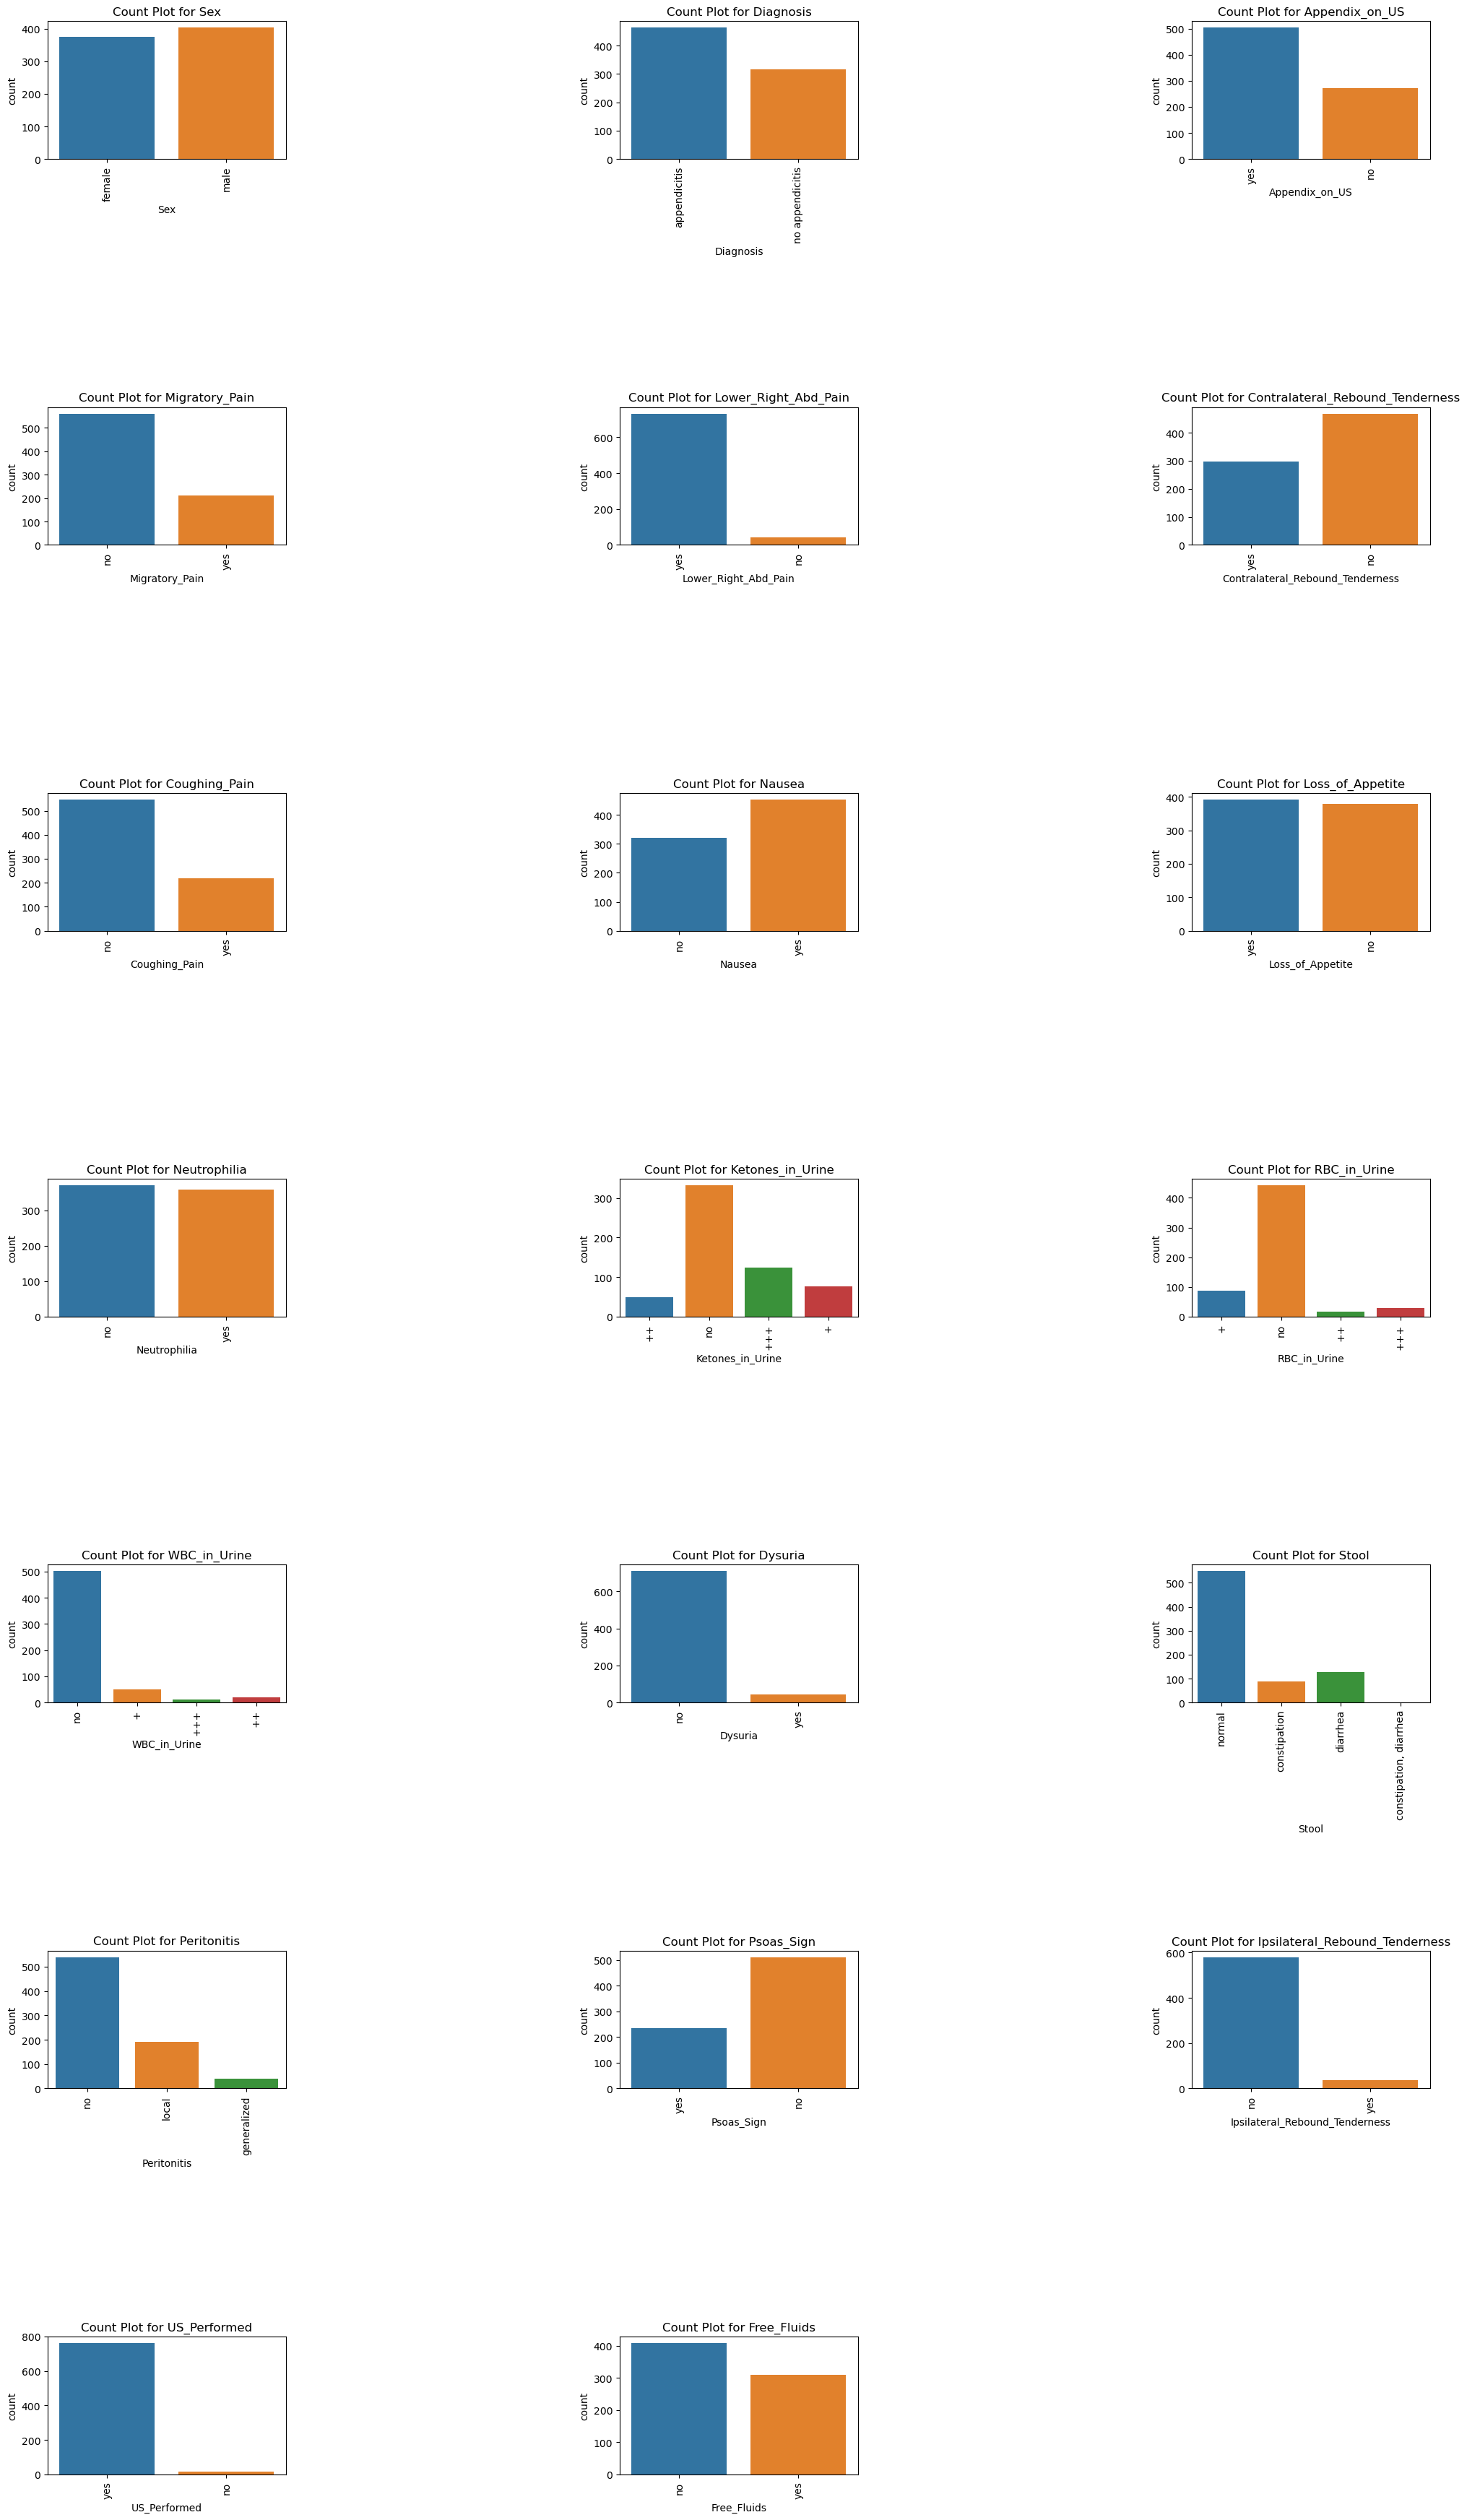

In [12]:
# EDA for Data visualization

# Univariate Aanlysis (count plots for categorical features)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = df.select_dtypes(include=['object']).columns

# Create count plots of seaborn library for each categorical column
# for col in categorical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(data=imputed_df, x=col)
#     plt.title(f'Count Plot for {col}')
#     plt.xticks(rotation=90)  # Rotate x-axis labels if needed
#     plt.show()

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column in a separate subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# Adjust layout to add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=1.4, hspace=1.8)

In [13]:
# Now lets seperate the target columns to perform imputation on the missing vlaues of feature columns

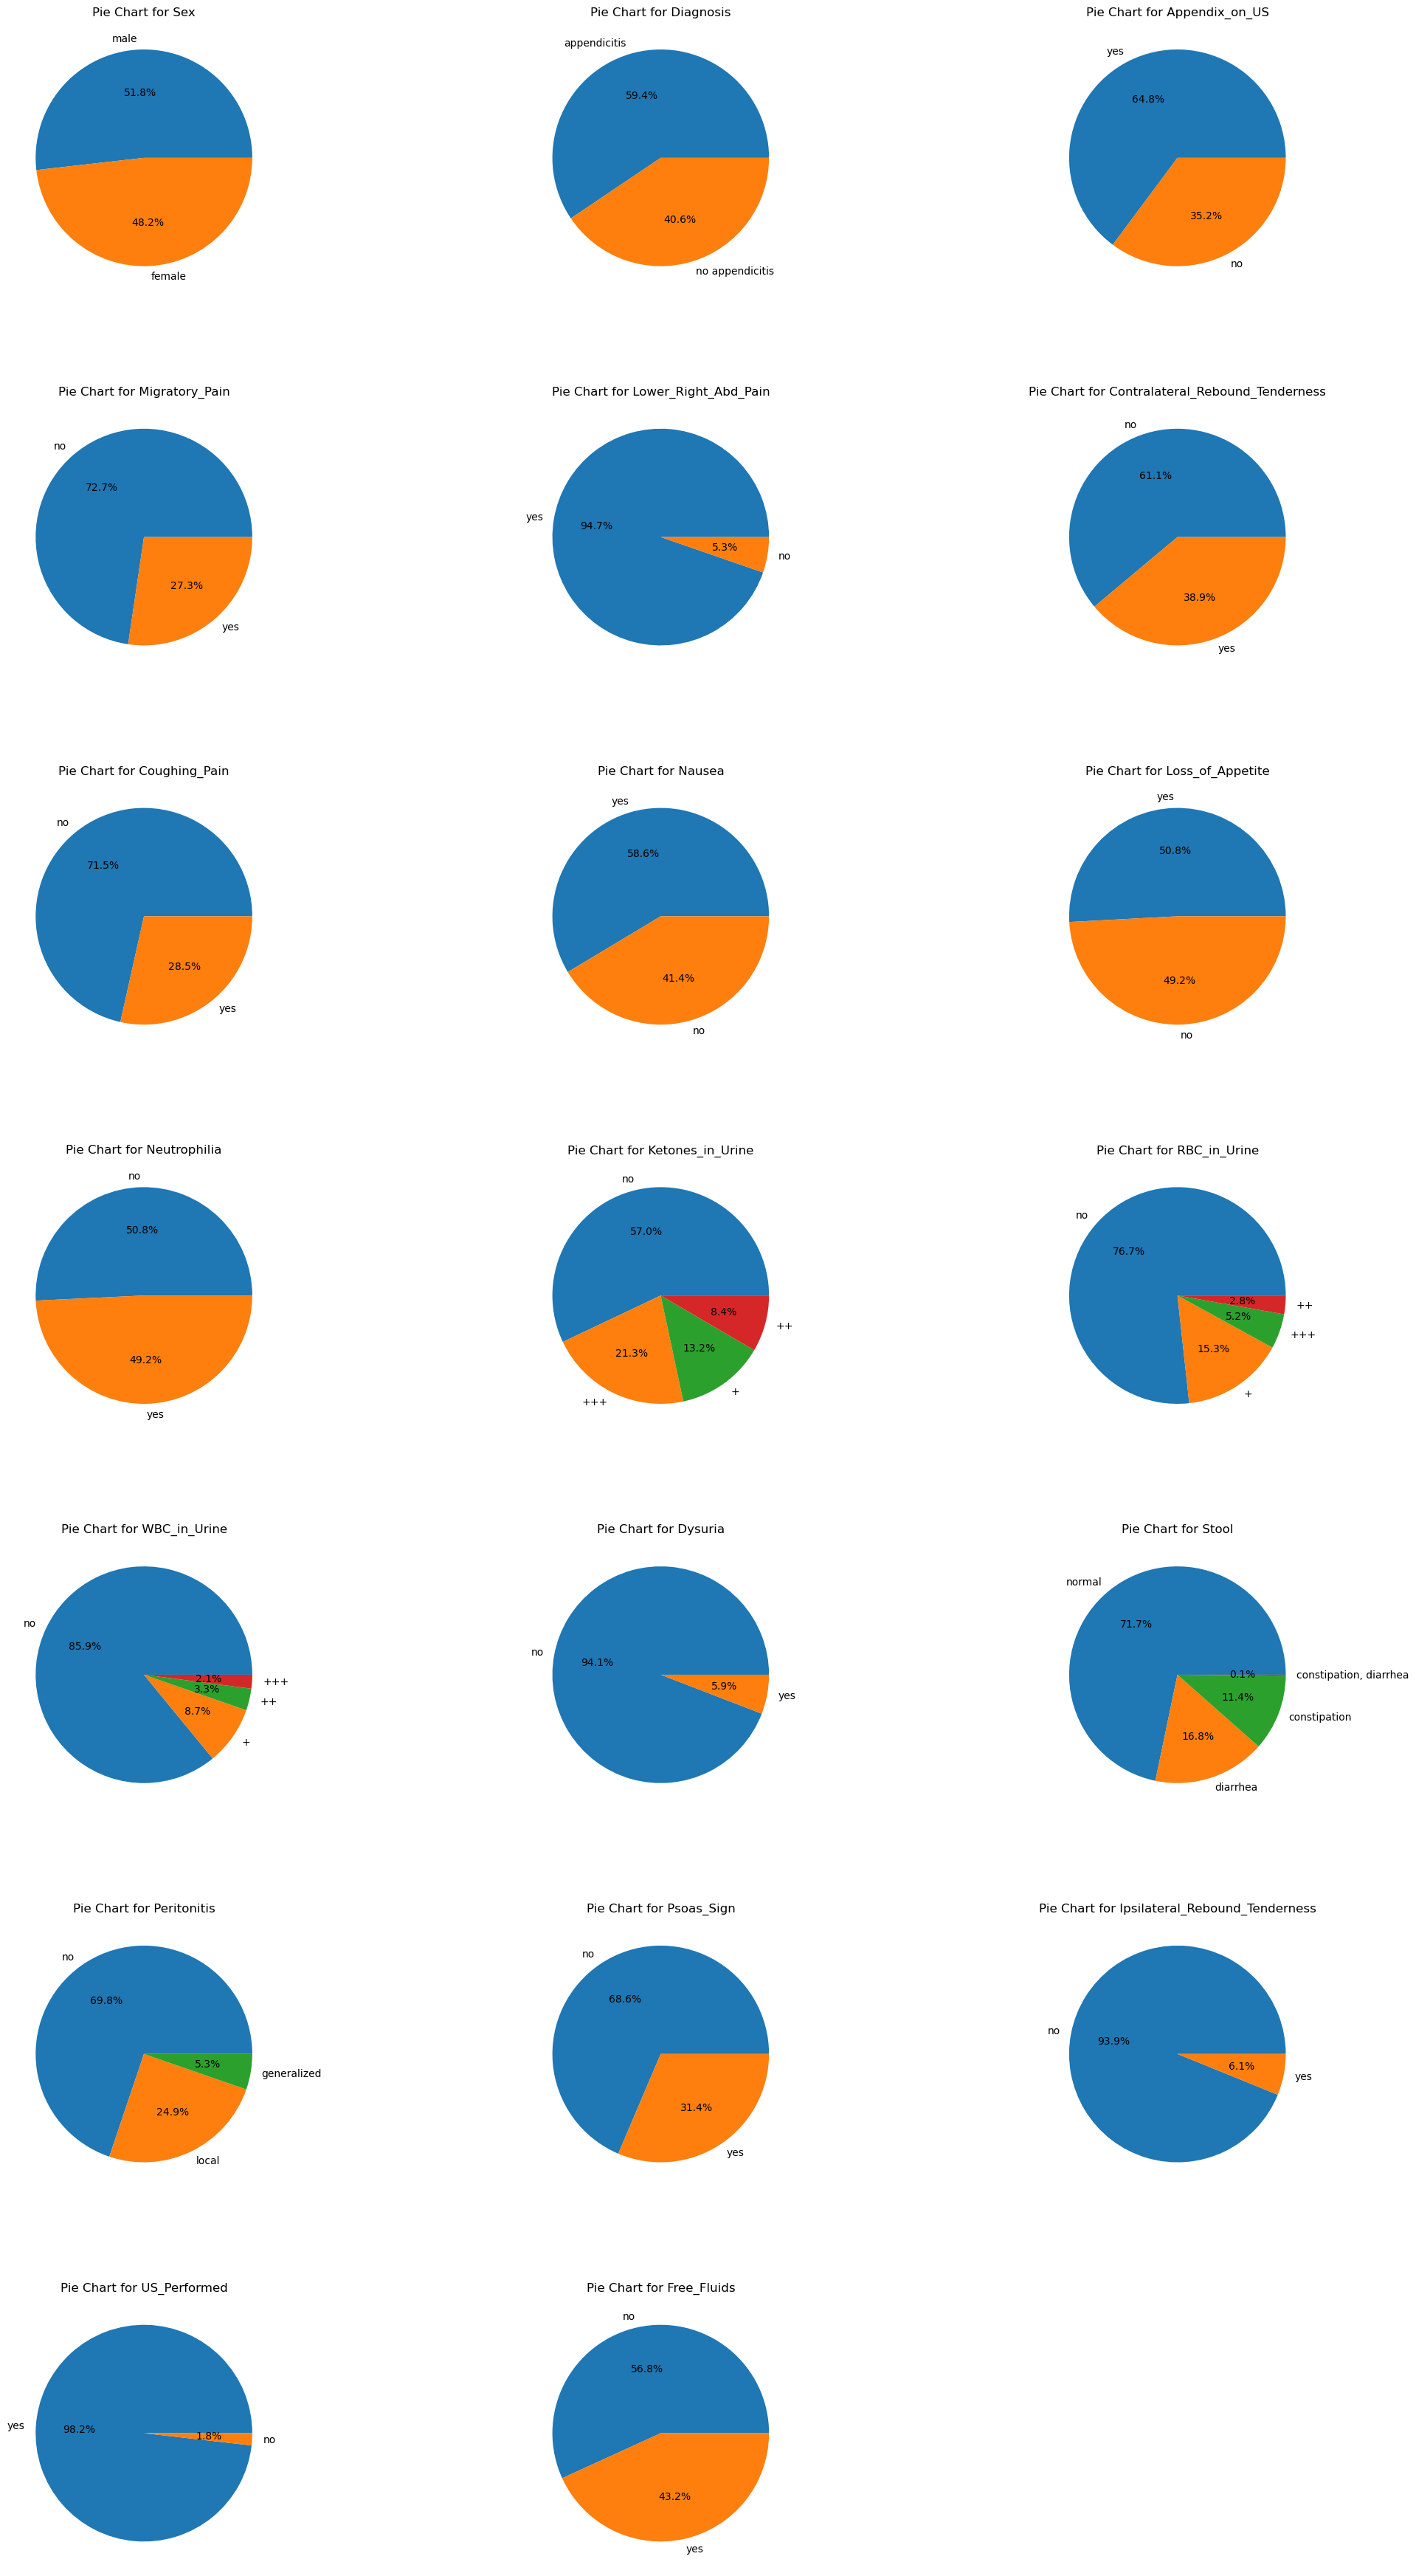

In [14]:
# Univariate Aanlysis (piechart plots for categorical features)

#sns.countplot(data = imputed_df, x = 'Stool')

import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column in a separate subplot
for i, col in enumerate(categorical_cols):
    category_counts = df[col].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'Pie Chart for {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()


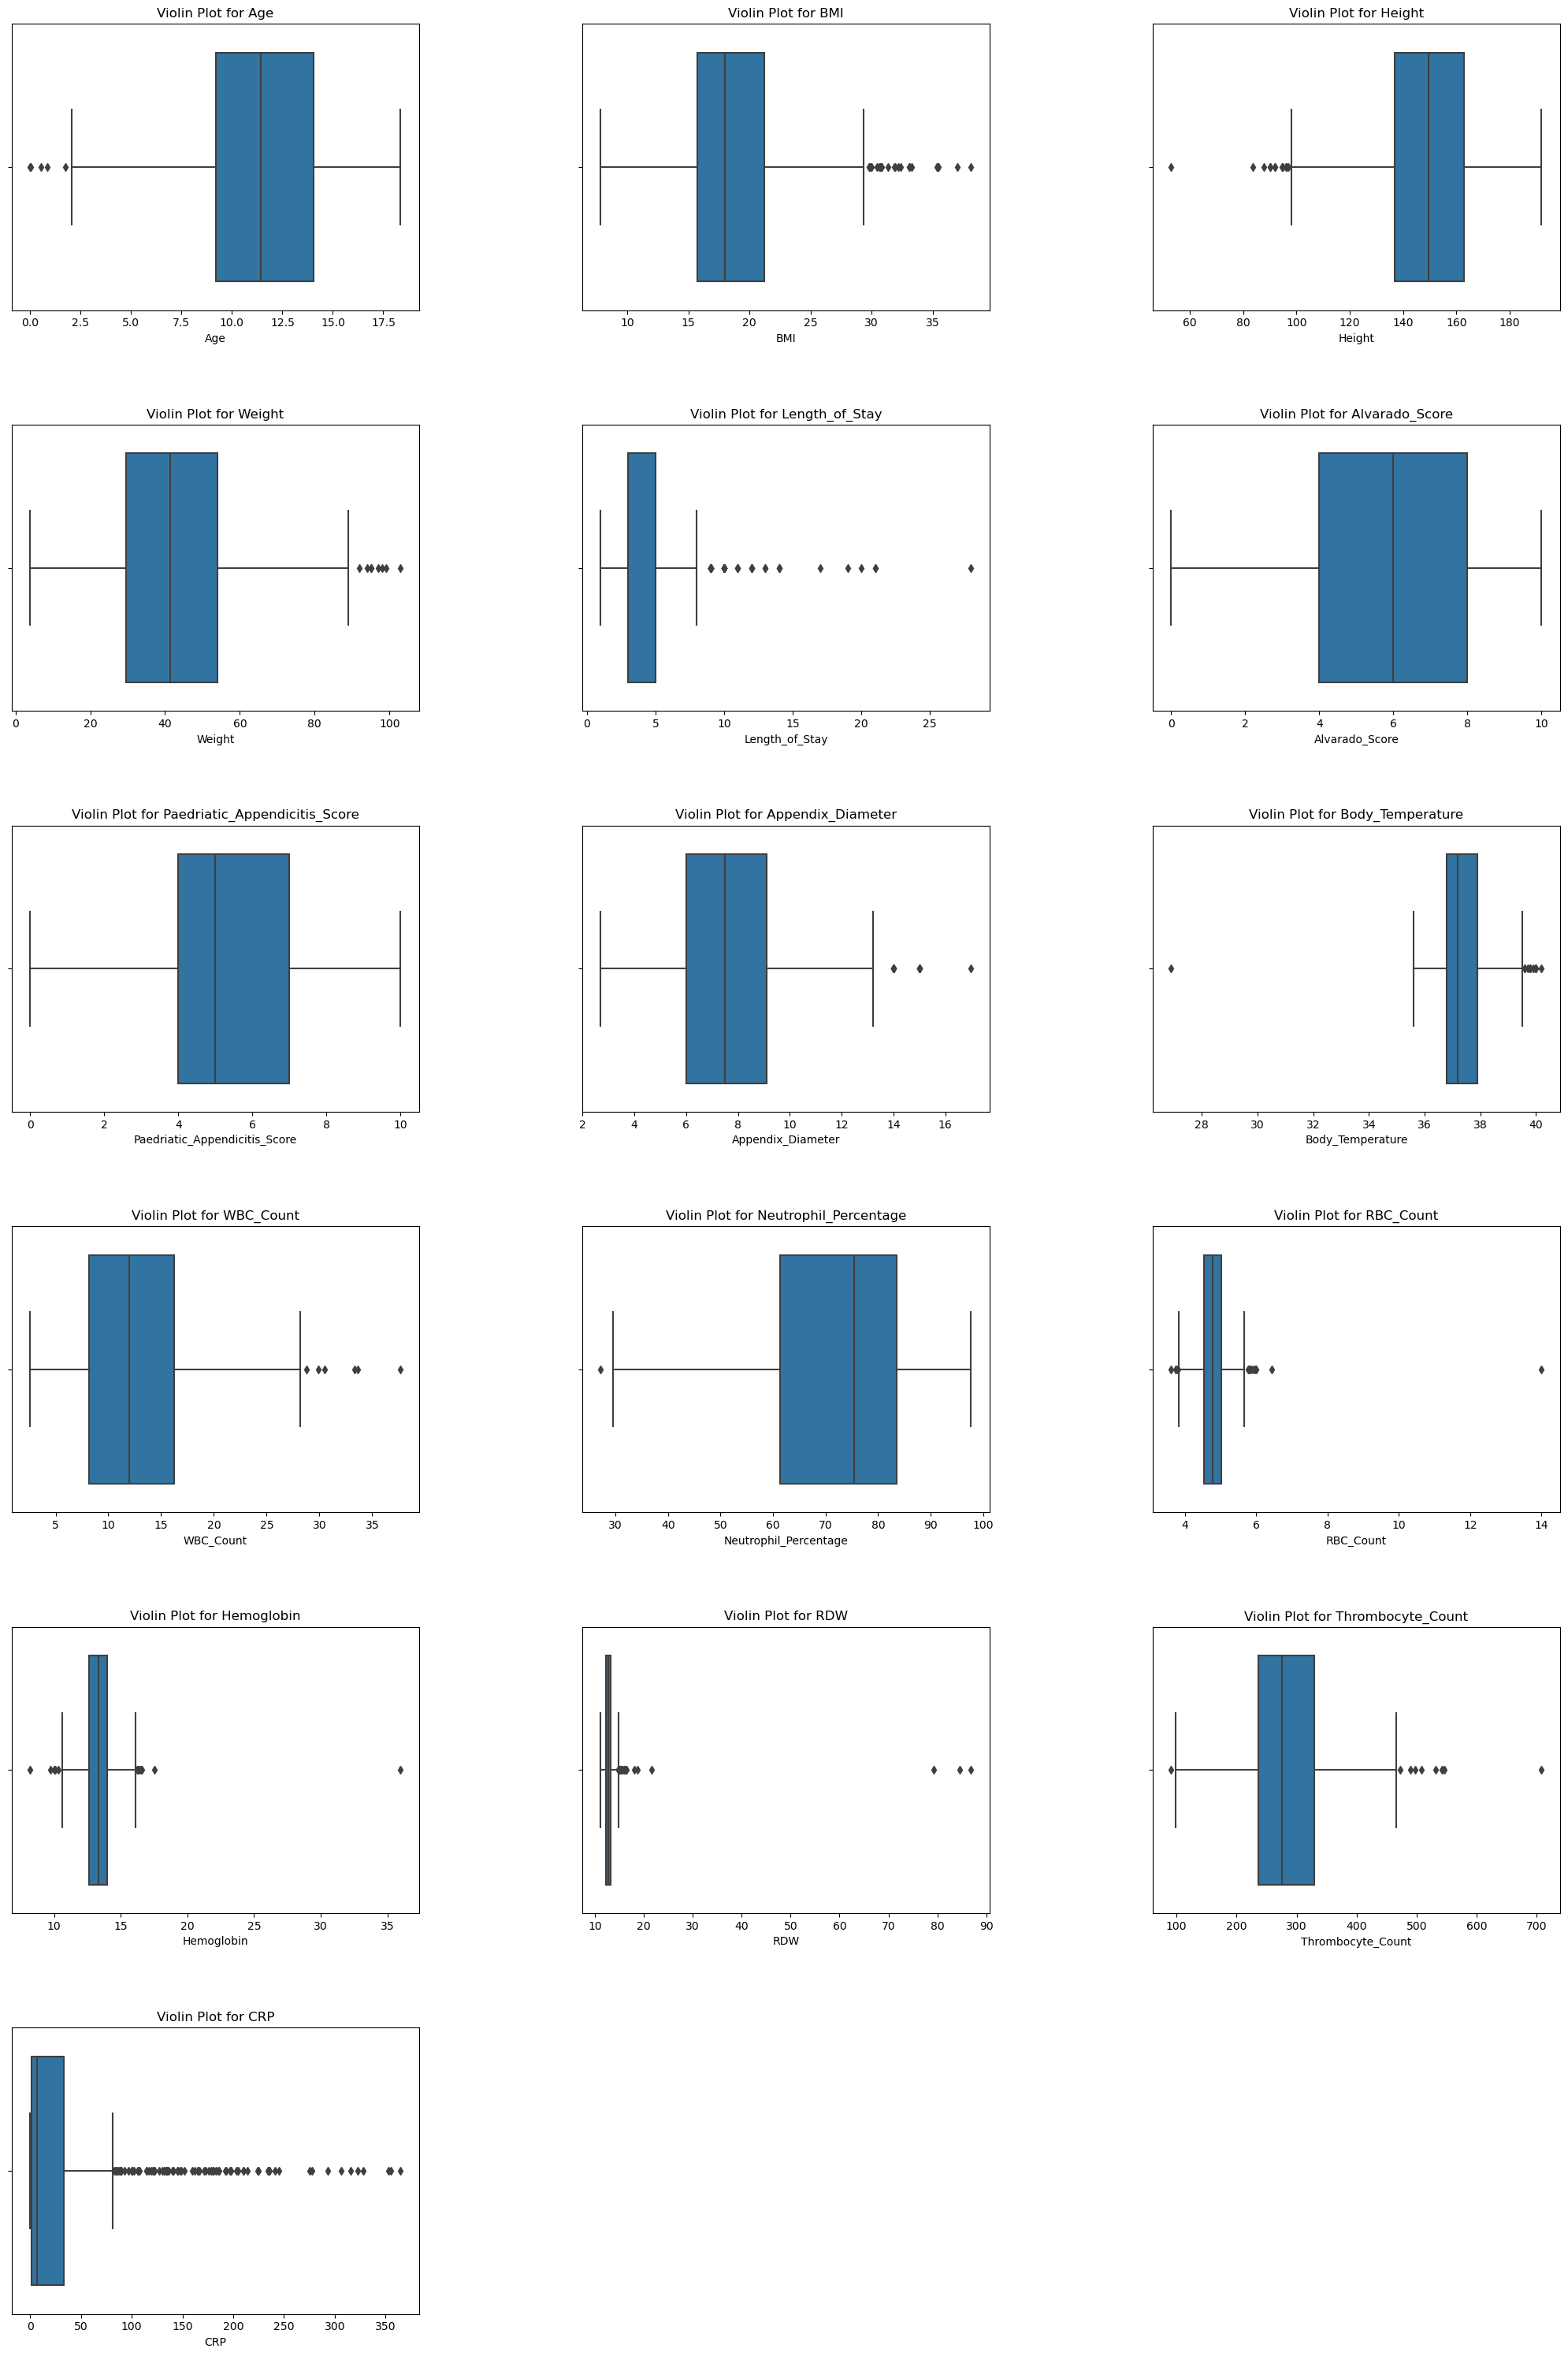

In [15]:
# Univariate Analysis of Numerical Features(Violin and Box plot for distribution analysis) 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
n_cols = 3  # Adjust based on your preference
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Violin Plot for {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()


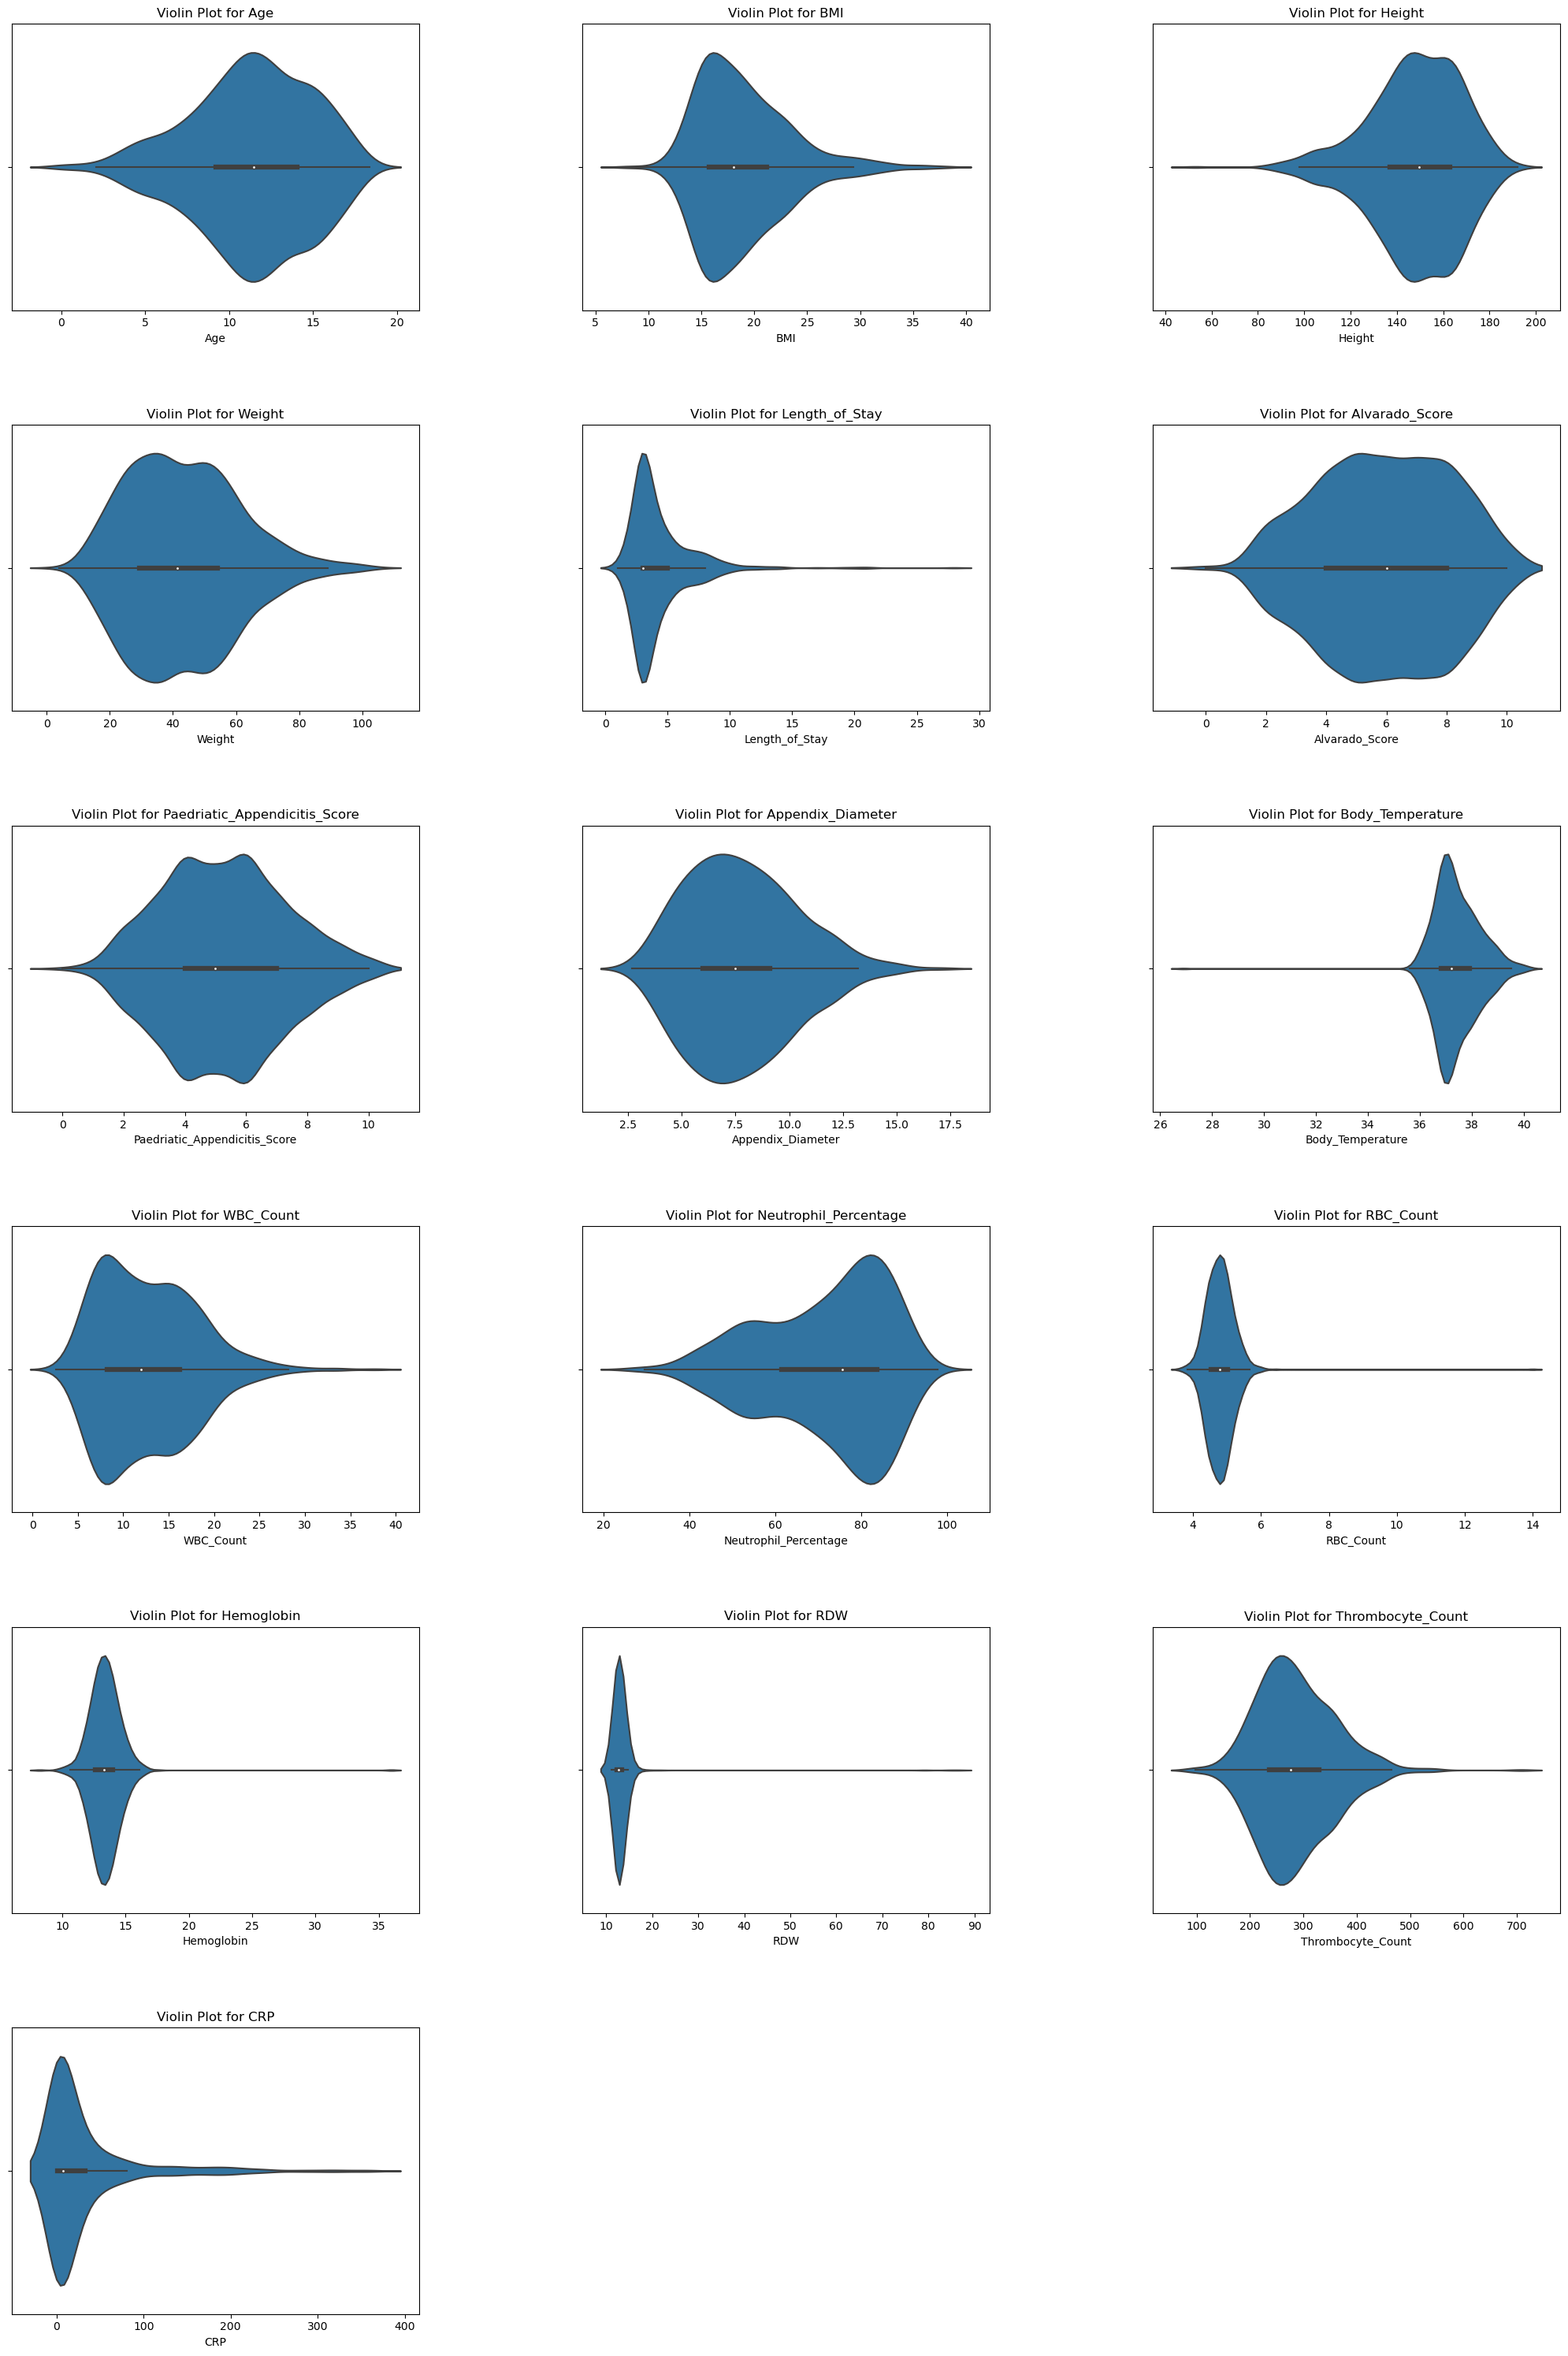

In [16]:
# univariate analysis(distribution plots - Violin plots)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
n_cols = 3  # Adjust based on your preference
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, col in enumerate(numerical_cols):
    sns.violinplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Violin Plot for {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()


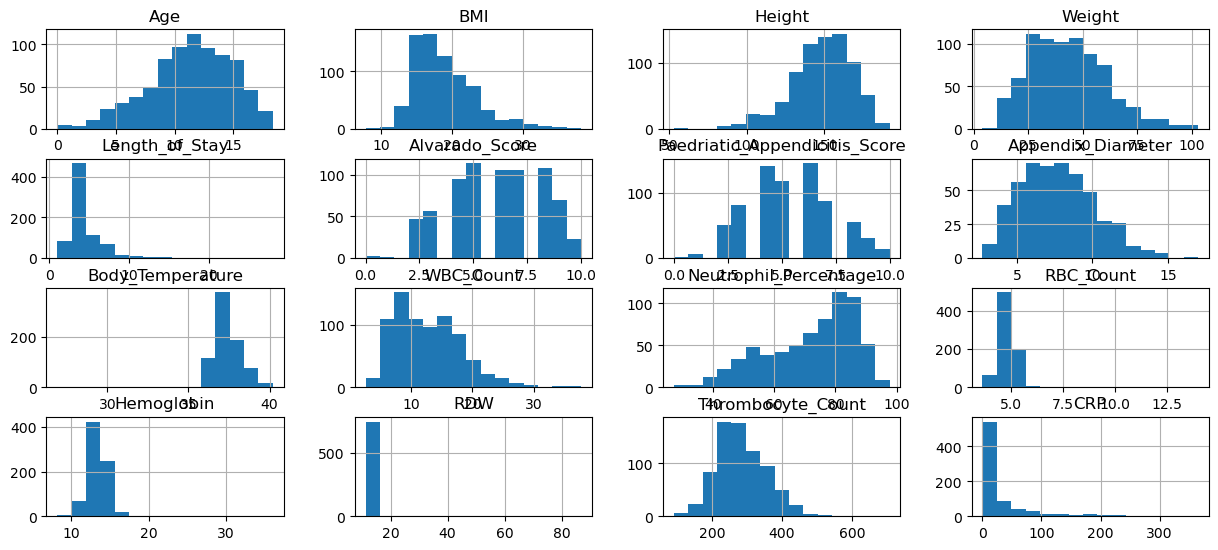

In [17]:
#EDA

import matplotlib.pyplot as plt

import seaborn as sns

df[numerical_cols].hist(bins=15, figsize=(15, 8), layout=(5, 4))
plt.show()




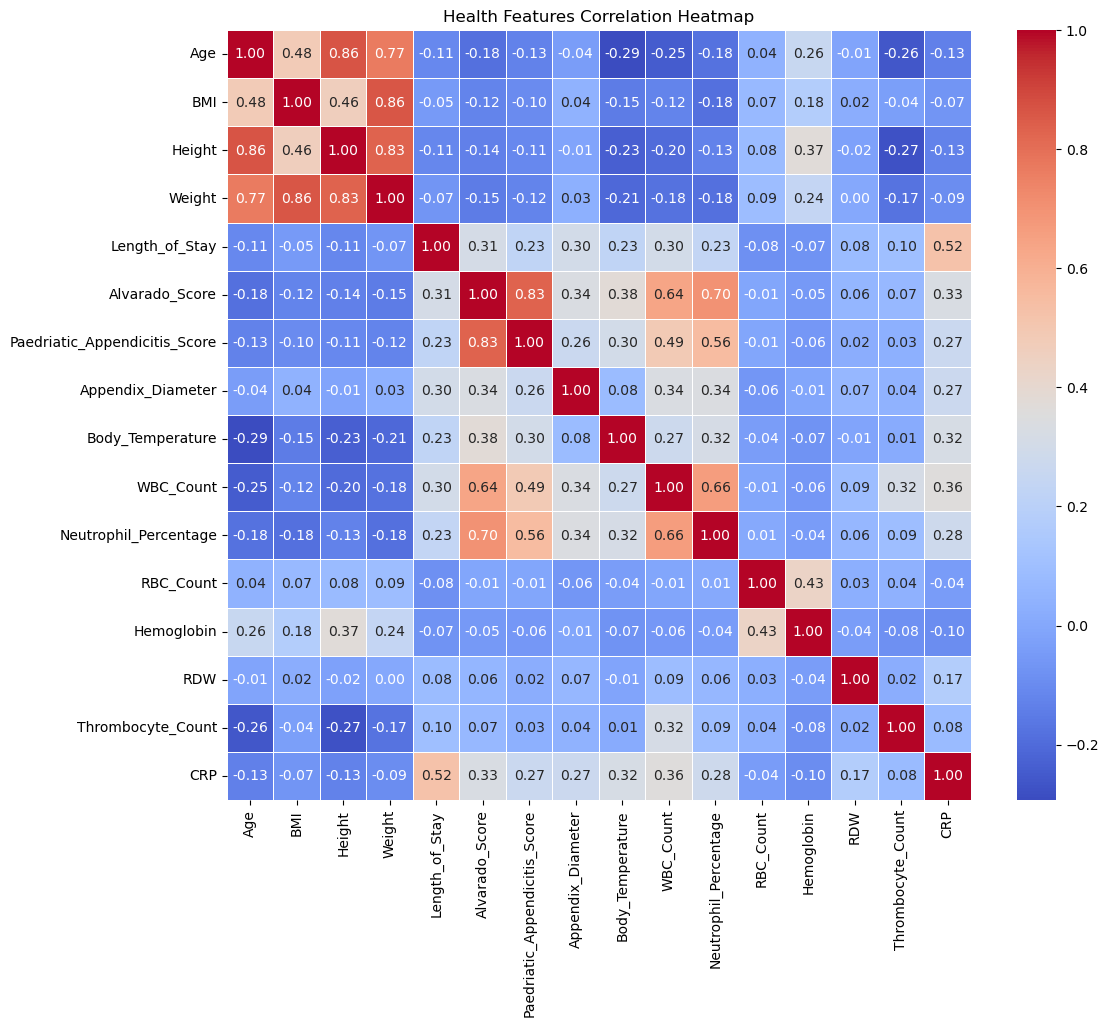

In [18]:
# Multivariate Analysis of numerical features
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Health Features Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [19]:


# Define the target and feature columns
# Define the target and feature columns
target_column = 'Diagnosis'
feature_columns = df.columns[df.columns != target_column]

# Split the data into features and target
X = df[feature_columns]
y = df[target_column]

# Imputation for missing values 

In [20]:
# NOTE : Make sure you impute only after seprating the Train and Test and use KNNImputer only on Train to prevent 
#  dataleak if done on whole dataset. so use KNNImputer on Trained, nect use it to impute the on Train and Test Data 

import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99,stratify=y)

# Separate numerical and categorical columns for both train and test sets
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute numerical columns using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
X_train_numerical_imputed = knn_imputer.fit_transform(X_train[numerical_cols])# both fit the imputer and transform on train
X_test_numerical_imputed = knn_imputer.transform(X_test[numerical_cols])# Tranfrom the imputer on test data

# Convert imputed numerical data back to DataFrame
X_train_numerical_df = pd.DataFrame(X_train_numerical_imputed, columns=numerical_cols)
X_test_numerical_df = pd.DataFrame(X_test_numerical_imputed, columns=numerical_cols)

# Impute categorical columns using SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical_imputed = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test_categorical_imputed = categorical_imputer.transform(X_test[categorical_cols])

# Convert imputed categorical data back to DataFrame
X_train_categorical_df = pd.DataFrame(X_train_categorical_imputed, columns=categorical_cols)
X_test_categorical_df = pd.DataFrame(X_test_categorical_imputed, columns=categorical_cols)

# Combine the imputed numerical and categorical data for both train and test sets
X_train = pd.concat([X_train_numerical_df, X_train_categorical_df], axis=1)
X_test = pd.concat([X_test_numerical_df, X_test_categorical_df], axis=1)

print(X_train)
print(X_test)



           Age        BMI  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.312115  24.621833  157.40    61.0             6.0            10.0   
1    10.750000  22.900000  155.00    54.5             3.0             7.0   
2    12.970000  17.800000  148.00    39.0             5.0             6.0   
3     8.130000  18.510000  123.00    28.0             9.0             7.0   
4    12.629706  21.249308  181.50    70.0             3.0             4.0   
..         ...        ...     ...     ...             ...             ...   
618  13.935661  21.872423  167.00    61.0             3.0             6.0   
619  15.720000  21.161596  151.48    52.0             3.0             4.0   
620   6.792608  14.201183  130.00    24.0             3.0             4.0   
621  10.006000  24.100000  155.00    58.1             2.0             7.0   
622   3.990000  14.400000  101.50    14.5             2.0             7.0   

     Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature  \


# Feature Engineering 

In [21]:
#ordinal label encoding for the  Ketones_in_Urine, RBC_in_Urine, WBC_in_Urine as we have 'no' '+' '++' '+++' values

# NOTE: Do This with train/test split to avoid dataleak, we have already split the data

# Define the order of the categories
categories = ['no', '+', '++', '+++']

    
# Apply ordered encoding to each specified column in the training set
for column in ['Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']:
    X_train[column] = pd.Categorical(X_train[column], categories=categories, ordered=True).codes

# Apply the same encoding to the test set
for column in ['Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']:
    X_test[column] = pd.Categorical(X_test[column], categories=categories, ordered=True).codes


print(X_train)
# categories = ['no', '+', '++', '+++']

# # Apply ordered encoding to each column separately
# df['Ketones_in_Urine'] = pd.Categorical(df['Ketones_in_Urine'], categories=categories, ordered=True).codes
# df['RBC_in_Urine'] = pd.Categorical(df['RBC_in_Urine'], categories=categories, ordered=True).codes
# df['WBC_in_Urine'] = pd.Categorical(df['WBC_in_Urine'], categories=categories, ordered=True).codes

           Age        BMI  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.312115  24.621833  157.40    61.0             6.0            10.0   
1    10.750000  22.900000  155.00    54.5             3.0             7.0   
2    12.970000  17.800000  148.00    39.0             5.0             6.0   
3     8.130000  18.510000  123.00    28.0             9.0             7.0   
4    12.629706  21.249308  181.50    70.0             3.0             4.0   
..         ...        ...     ...     ...             ...             ...   
618  13.935661  21.872423  167.00    61.0             3.0             6.0   
619  15.720000  21.161596  151.48    52.0             3.0             4.0   
620   6.792608  14.201183  130.00    24.0             3.0             4.0   
621  10.006000  24.100000  155.00    58.1             2.0             7.0   
622   3.990000  14.400000  101.50    14.5             2.0             7.0   

     Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature  \


# Outliers

In [22]:
# We need to hadle the numerical value outliers as we have seen some of them like CRP, RBC...
# Outlier detection and removal using IsolationForest should be done using 

from sklearn.ensemble import IsolationForest

#numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply IsolationForest to detect outliers in the training data (fit and transform)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers_train = iso_forest.fit_predict(X_train[numerical_cols])

# Filter out the outliers from the training DataFrame
X_train = X_train[outliers_train == 1]
y_train = y_train[outliers_train == 1]


# Transform the test data (important: do not fit again, just transform)
outliers_test = iso_forest.predict(X_test[numerical_cols])
X_test = X_test[outliers_test == 1]
y_test = y_test[outliers_test == 1]


#df = df[outliers == 1] # df[outliers == 1]where 1 indicates an inlier (normal data point) and -1 indicates an outlier.



# from scipy.stats.mstats import winsorize

# df['feature'] = winsorize(df['feature'], limits=[0.05, 0.05])

In [23]:
# Encoding the Categorical values to numeircal

from sklearn.preprocessing import LabelEncoder


# Separate numerical and categorical columns for both train and test sets
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


# Initialize LabelEncoders for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Fit the LabelEncoders on the training data and transform the training data
for col, le in label_encoders.items():
    X_train[col] = le.fit_transform(X_train[col])

# Transform the test data using the fitted LabelEncoders
for col, le in label_encoders.items():
    X_test[col] = le.transform(X_test[col])
    
    
# Initialize and fit a LabelEncoder for the target variable
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

target_encoder = LabelEncoder()
y_train = pd.Series(target_encoder.fit_transform(y_train), index=y_train.index)
y_test = pd.Series(target_encoder.transform(y_test), index=y_test.index)


# Print the transformed training and testing data
print("Training Data after Label Encoding:\n", X_train)
print("Testing Data after Label Encoding:\n", X_test)

print("Training Data after Label Encoding Target:\n", y_train)
print("Testing Data after Label Encoding Target:\n", y_test)

# now convert back 




Training Data after Label Encoding:
            Age        BMI  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.312115  24.621833  157.40    61.0             6.0            10.0   
1    10.750000  22.900000  155.00    54.5             3.0             7.0   
2    12.970000  17.800000  148.00    39.0             5.0             6.0   
3     8.130000  18.510000  123.00    28.0             9.0             7.0   
4    12.629706  21.249308  181.50    70.0             3.0             4.0   
..         ...        ...     ...     ...             ...             ...   
618  13.935661  21.872423  167.00    61.0             3.0             6.0   
619  15.720000  21.161596  151.48    52.0             3.0             4.0   
620   6.792608  14.201183  130.00    24.0             3.0             4.0   
621  10.006000  24.100000  155.00    58.1             2.0             7.0   
622   3.990000  14.400000  101.50    14.5             2.0             7.0   

     Paedriatic_Appendicitis_Score  Ap

# Scaler for normalization - PreProcessing 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the fitted scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


print(X_train[numerical_cols] .head())
print(X_test[numerical_cols] .head())

        Age       BMI    Height    Weight  Length_of_Stay  Alvarado_Score  \
0  0.311460  1.444635  0.543564  1.197990        1.141780        1.997540   
1 -0.163972  1.021791  0.408288  0.779432       -0.524473        0.550546   
2  0.511688 -0.230656  0.013735 -0.218666        0.586362        0.068215   
3 -0.961373 -0.056295 -1.395385 -0.926994        2.808032        0.550546   
4  0.408119  0.616418  1.901955  1.777531       -0.524473       -0.896447   

   Paedriatic_Appendicitis_Score  Appendix_Diameter  Body_Temperature  \
0                       2.034862           0.871098          0.763423   
1                       0.967394          -1.280278          0.384889   
2                      -0.633810           1.653416         -0.246002   
3                      -0.100075           2.142365          0.763423   
4                      -1.167544          -0.409949         -0.498359   

   WBC_Count  Neutrophil_Percentage  RBC_Count  Hemoglobin       RDW  \
0   1.156313              

In [25]:
# now do feature selection and do train test split/ Cross validtion and model evaluation

In [26]:
import pandas as pd
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel,  RFE
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import metrics
import warnings, sklearn.exceptions

warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)



# Random Forest Feature Importance
print("--Feature Selection using Random Forest Feature Importance--")
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy', random_state=1)
rf_clf.fit(X_train, y_train)
sfm_rf = SelectFromModel(rf_clf, threshold='mean')
sfm_rf.fit(X_train, y_train)

# Get selected features
selected_features_rf = X_train.columns[sfm_rf.get_support()]
print(f"Selected features by Random Forest: {selected_features_rf.tolist()}")

# Train a model using only selected features
X_train_rf = sfm_rf.transform(X_train)
X_test_rf = sfm_rf.transform(X_test)

rf_clf.fit(X_train_rf, y_train)
rf_scores = cross_validate(rf_clf, X_train_rf, y_train, scoring=['accuracy', 'roc_auc'], cv=5)

print("Random Forest Acc: %0.2f (+/- %0.2f)" % (rf_scores['test_accuracy'].mean(), rf_scores['test_accuracy'].std() * 2))
print("Random Forest AUC: %0.2f (+/- %0.2f)" % (rf_scores['test_roc_auc'].mean(), rf_scores['test_roc_auc'].std() * 2))

# Evaluate on the test set for Random Forest
rf_test_score = rf_clf.score(X_test_rf, y_test)
print(f"Random Forest Test Accuracy: {rf_test_score}")

# Recursive Feature Elimination (RFE) with Random Forest
print("\n--Feature Selection using RFE--")
rfe_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy', random_state=1)
rfe = RFE(estimator=rfe_clf, n_features_to_select=13, step=1)
rfe.fit(X_train, y_train)

# Get selected features
selected_features_rfe = X_train.columns[rfe.get_support()]
print(f"Selected features by RFE: {selected_features_rfe.tolist()}")

# Train a model using only selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

rfe_clf.fit(X_train_rfe, y_train)
rfe_scores = cross_validate(rfe_clf, X_train_rfe, y_train, scoring=['accuracy', 'roc_auc'], cv=5)

print("RFE Acc: %0.2f (+/- %0.2f)" % (rfe_scores['test_accuracy'].mean(), rfe_scores['test_accuracy'].std() * 2))
print("RFE AUC: %0.2f (+/- %0.2f)" % (rfe_scores['test_roc_auc'].mean(), rfe_scores['test_roc_auc'].std() * 2))

# Evaluate on the test set for RFE
rfe_test_score = rfe_clf.score(X_test_rfe, y_test)
print(f"RFE Test Accuracy: {rfe_test_score}")

# Wrapper-Based Random Forest
print("\n--Wrapper-Based Feature Selection with Random Forest--")
# Perform feature selection using cross-validation and Random Forest
wrapper_selected_features = []
max_features = X_train.shape[1]
for i in range(1, max_features + 1):
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, criterion='entropy', random_state=1)
    rfe = RFE(estimator=rf_clf, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    X_train_rfe = rfe.transform(X_train)
    scores = cross_validate(rfe.estimator_, X_train_rfe, y_train, scoring=['accuracy'], cv=5)
    mean_score = scores['test_accuracy'].mean()
    wrapper_selected_features.append((mean_score, i, X_train.columns[rfe.get_support()]))

# Select the best feature set
best_features = max(wrapper_selected_features, key=lambda x: x[0])
selected_features_wrapper = best_features[2]
print(f"Selected features by Wrapper-Based Random Forest: {selected_features_wrapper.tolist()}")

# Train a model using only selected features
X_train_wrapper = X_train[selected_features_wrapper]
X_test_wrapper = X_test[selected_features_wrapper]

wrapper_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, criterion='entropy', random_state=1)
wrapper_clf.fit(X_train_wrapper, y_train)
wrapper_scores = cross_validate(wrapper_clf, X_train_wrapper, y_train, scoring=['accuracy', 'roc_auc'], cv=5)

print("Wrapper-Based RF Acc: %0.2f (+/- %0.2f)" % (wrapper_scores['test_accuracy'].mean(), wrapper_scores['test_accuracy'].std() * 2))
print("Wrapper-Based RF AUC: %0.2f (+/- %0.2f)" % (wrapper_scores['test_roc_auc'].mean(), wrapper_scores['test_roc_auc'].std() * 2))

# Evaluate on the test set for Wrapper-Based RF
wrapper_test_score = wrapper_clf.score(X_test_wrapper, y_test)
print(f"Wrapper-Based RF Test Accuracy: {wrapper_test_score}")

--Feature Selection using Random Forest Feature Importance--
Selected features by Random Forest: ['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'WBC_Count', 'Neutrophil_Percentage', 'CRP', 'Appendix_on_US', 'Peritonitis']
Random Forest Acc: 0.94 (+/- 0.05)
Random Forest AUC: 0.98 (+/- 0.01)
Random Forest Test Accuracy: 0.9432624113475178

--Feature Selection using RFE--
Selected features by RFE: ['Age', 'BMI', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'WBC_Count', 'Neutrophil_Percentage', 'Thrombocyte_Count', 'CRP', 'Appendix_on_US', 'Peritonitis']
RFE Acc: 0.94 (+/- 0.04)
RFE AUC: 0.98 (+/- 0.01)
RFE Test Accuracy: 0.9432624113475178

--Wrapper-Based Feature Selection with Random Forest--
Selected features by Wrapper-Based Random Forest: ['Age', 'BMI', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

class GainRatioFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
    
    def fit(self, X, y):
        self.features_ = self._calculate_gain_ratio(X, y)
        return self
    
    def transform(self, X):
        return X[self.features_]
    
    def _calculate_gain_ratio(self, X, y):
        info_gain = mutual_info_classif(X, y)
        intrinsic_info = np.array([self._entropy(X.iloc[:, i]) for i in range(X.shape[1])])
        gain_ratio = info_gain / (intrinsic_info + 1e-10)  # Adding a small value to avoid division by zero
        selected_features = X.columns[gain_ratio >= self.threshold]
        return selected_features
    
    def _entropy(self, col):
        counts = col.value_counts()
        probs = counts / len(col)
        return -np.sum(probs * np.log2(probs))


# Gain Ratio Feature Selection
gr_selector = GainRatioFeatureSelector(threshold=0.02)
gr_selector.fit(X_train, y_train)

# Get selected features
selected_features_gr = gr_selector.features_
print(f"Selected features by Gain Ratio: {selected_features_gr.tolist()}")

# Train a model using only selected features
X_train_gr = gr_selector.transform(X_train)
X_test_gr = gr_selector.transform(X_test)

# Example with Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='gini', random_state=1)
rf_clf.fit(X_train_gr, y_train)
rf_scores = cross_validate(rf_clf, X_train_gr, y_train, scoring=['accuracy', 'roc_auc'], cv=5)

print("Random Forest Acc (Gain Ratio): %0.2f (+/- %0.2f)" % (rf_scores['test_accuracy'].mean(), rf_scores['test_accuracy'].std() * 2))
print("Random Forest AUC (Gain Ratio): %0.2f (+/- %0.2f)" % (rf_scores['test_roc_auc'].mean(), rf_scores['test_roc_auc'].std() * 2))

# Evaluate on the test set
rf_test_score = rf_clf.score(X_test_gr, y_test)
print(f"Random Forest Test Accuracy (Gain Ratio): {rf_test_score}")


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Example with SVM
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_clf.fit(X_train_gr, y_train)
svm_scores = cross_validate(svm_clf, X_train_gr, y_train, scoring=['accuracy', 'roc_auc'], cv=5)

print("SVM Acc: %0.2f (+/- %0.2f)" % (svm_scores['test_accuracy'].mean(), svm_scores['test_accuracy'].std() * 2))
print("SVM AUC: %0.2f (+/- %0.2f)" % (svm_scores['test_roc_auc'].mean(), svm_scores['test_roc_auc'].std() * 2))

svm_test_score = svm_clf.score(X_test_gr, y_test)
print(f"SVM Test Accuracy: {svm_test_score:.4f}")

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_gr, y_train)
gb_scores = cross_validate(gb_clf, X_train_gr, y_train, scoring=['accuracy', 'roc_auc'], cv=5)
print("Gradient Boosting Acc: %0.2f (+/- %0.2f)" % (gb_scores['test_accuracy'].mean(), gb_scores['test_accuracy'].std() * 2))
print("Gradient Boosting AUC: %0.2f (+/- %0.2f)" % (gb_scores['test_roc_auc'].mean(), gb_scores['test_roc_auc'].std() * 2))
gb_test_score = gb_clf.score(X_test_gr, y_test)
print(f"Gradient Boosting Test Accuracy: {gb_test_score:.4f}")

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_gr, y_train)
knn_scores = cross_validate(knn_clf, X_train_gr, y_train, scoring=['accuracy', 'roc_auc'], cv=5)
print("KNN Acc: %0.2f (+/- %0.2f)" % (knn_scores['test_accuracy'].mean(), knn_scores['test_accuracy'].std() * 2))
print("KNN AUC: %0.2f (+/- %0.2f)" % (knn_scores['test_roc_auc'].mean(), knn_scores['test_roc_auc'].std() * 2))
knn_test_score = knn_clf.score(X_test_gr, y_test)
print(f"KNN Test Accuracy: {knn_test_score:.4f}")

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_gr, y_train)
xgb_scores = cross_validate(xgb_clf, X_train_gr, y_train, scoring=['accuracy', 'roc_auc'], cv=5)
print("XGBoost Acc: %0.2f (+/- %0.2f)" % (xgb_scores['test_accuracy'].mean(), xgb_scores['test_accuracy'].std() * 2))
print("XGBoost AUC: %0.2f (+/- %0.2f)" % (xgb_scores['test_roc_auc'].mean(), xgb_scores['test_roc_auc'].std() * 2))
xgb_test_score = xgb_clf.score(X_test_gr, y_test)
print(f"XGBoost Test Accuracy: {xgb_test_score:.4f}")

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_clf.fit(X_train_gr, y_train)
mlp_scores = cross_validate(mlp_clf, X_train_gr, y_train, scoring=['accuracy', 'roc_auc'], cv=5)
print("MLPClassifier Acc: %0.2f (+/- %0.2f)" % (mlp_scores['test_accuracy'].mean(), mlp_scores['test_accuracy'].std() * 2))
print("MLPClassifier AUC: %0.2f (+/- %0.2f)" % (mlp_scores['test_roc_auc'].mean(), mlp_scores['test_roc_auc'].std() * 2))
mlp_test_score = mlp_clf.score(X_test_gr, y_test)
print(f"MLPClassifier Test Accuracy: {mlp_test_score:.4f}")



Selected features by Gain Ratio: ['Length_of_Stay', 'Appendix_Diameter', 'Appendix_on_US', 'Nausea', 'Neutrophilia', 'WBC_in_Urine', 'Stool', 'Peritonitis', 'US_Performed']
Random Forest Acc (Gain Ratio): 0.92 (+/- 0.06)
Random Forest AUC (Gain Ratio): 0.96 (+/- 0.04)
Random Forest Test Accuracy (Gain Ratio): 0.9361702127659575
SVM Acc: 0.90 (+/- 0.10)
SVM AUC: 0.96 (+/- 0.03)
SVM Test Accuracy: 0.9291
Gradient Boosting Acc: 0.92 (+/- 0.08)
Gradient Boosting AUC: 0.97 (+/- 0.03)
Gradient Boosting Test Accuracy: 0.9362
KNN Acc: 0.90 (+/- 0.06)
KNN AUC: 0.94 (+/- 0.04)
KNN Test Accuracy: 0.9362
XGBoost Acc: 0.92 (+/- 0.08)
XGBoost AUC: 0.97 (+/- 0.03)
XGBoost Test Accuracy: 0.9362
MLPClassifier Acc: 0.92 (+/- 0.07)
MLPClassifier AUC: 0.96 (+/- 0.04)
MLPClassifier Test Accuracy: 0.9291


In [28]:
# final model checks

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#X = df[feature_columns]
#y = df[target_column]

# Random Forest with Cross-Validation
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.2f} (+/- {rf_cv_scores.std() * 2:.2f})")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")

# XGBoost with Cross-Validation
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost CV Accuracy: {xgb_cv_scores.mean():.2f} (+/- {xgb_cv_scores.std() * 2:.2f})")
print(f"XGBoost Test Accuracy: {xgb_accuracy:.2f}")

# Neural Network with Cross-Validation
scaler = StandardScaler()
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
pipeline = make_pipeline(scaler, nn_clf)
nn_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
pipeline.fit(X_train, y_train)
y_pred_nn = pipeline.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network CV Accuracy: {nn_cv_scores.mean():.2f} (+/- {nn_cv_scores.std() * 2:.2f})")
print(f"Neural Network Test Accuracy: {nn_accuracy:.2f}")

# SVM with Cross-Validation
svm_clf = SVC(kernel='linear', random_state=42)
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM CV Accuracy: {svm_cv_scores.mean():.2f} (+/- {svm_cv_scores.std() * 2:.2f})")
print(f"SVM Test Accuracy: {svm_accuracy:.2f}")

Random Forest CV Accuracy: 0.93 (+/- 0.05)
Random Forest Test Accuracy: 0.94
XGBoost CV Accuracy: 0.95 (+/- 0.03)
XGBoost Test Accuracy: 0.94
Neural Network CV Accuracy: 0.84 (+/- 0.09)
Neural Network Test Accuracy: 0.88
SVM CV Accuracy: 0.88 (+/- 0.06)
SVM Test Accuracy: 0.89


In [30]:
!pip install xgboost


In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import time



def calculate_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_test, y_pred, average='binary')
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, sensitivity, specificity, f1, balanced_acc, mcc, roc_auc

# Random Forest with Cross-Validation
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_runtime = time.time() - start_time
rf_accuracy, rf_precision, rf_sensitivity, rf_specificity, rf_f1, rf_balanced_acc, rf_mcc, rf_roc_auc = calculate_metrics(y_test, y_pred_rf)
print(f"Random Forest Runtime: {rf_runtime:.2f} seconds")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.2f} (+/- {rf_cv_scores.std() * 2:.2f})")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Sensitivity: {rf_sensitivity:.2f}")
print(f"Random Forest Specificity: {rf_specificity:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.2f}")

# XGBoost with Cross-Validation
start_time = time.time()
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_runtime = time.time() - start_time
xgb_accuracy, xgb_precision, xgb_sensitivity, xgb_specificity, xgb_f1, xgb_balanced_acc, xgb_mcc, xgb_roc_auc = calculate_metrics(y_test, y_pred_xgb)
print(f"XGBoost Runtime: {xgb_runtime:.2f} seconds")
print(f"XGBoost CV Accuracy: {xgb_cv_scores.mean():.2f} (+/- {xgb_cv_scores.std() * 2:.2f})")
print(f"XGBoost Test Accuracy: {xgb_accuracy:.2f}")
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Sensitivity: {xgb_sensitivity:.2f}")
print(f"XGBoost Specificity: {xgb_specificity:.2f}")
print(f"XGBoost F1 Score: {xgb_f1:.2f}")
print(f"XGBoost ROC-AUC: {xgb_roc_auc:.2f}")

# Neural Network with Cross-Validation
start_time = time.time()
scaler = StandardScaler()
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
pipeline = make_pipeline(scaler, nn_clf)
nn_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
pipeline.fit(X_train, y_train)
y_pred_nn = pipeline.predict(X_test)
nn_runtime = time.time() - start_time
nn_accuracy, nn_precision, nn_sensitivity, nn_specificity, nn_f1, nn_balanced_acc, nn_mcc, nn_roc_auc = calculate_metrics(y_test, y_pred_nn)
print(f"Neural Network Runtime: {nn_runtime:.2f} seconds")
print(f"Neural Network CV Accuracy: {nn_cv_scores.mean():.2f} (+/- {nn_cv_scores.std() * 2:.2f})")
print(f"Neural Network Test Accuracy: {nn_accuracy:.2f}")
print(f"Neural Network Precision: {nn_precision:.2f}")
print(f"Neural Network Sensitivity: {nn_sensitivity:.2f}")
print(f"Neural Network Specificity: {nn_specificity:.2f}")
print(f"Neural Network F1 Score: {nn_f1:.2f}")
print(f"Neural Network ROC-AUC: {nn_roc_auc:.2f}")

# SVM with Cross-Validation
start_time = time.time()
svm_clf = SVC(kernel='linear', random_state=42)
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_runtime = time.time() - start_time
svm_accuracy, svm_precision, svm_sensitivity, svm_specificity, svm_f1, svm_balanced_acc, svm_mcc, svm_roc_auc = calculate_metrics(y_test, y_pred_svm)
print(f"SVM Runtime: {svm_runtime:.2f} seconds")
print(f"SVM CV Accuracy: {svm_cv_scores.mean():.2f} (+/- {svm_cv_scores.std() * 2:.2f})")
print(f"SVM Test Accuracy: {svm_accuracy:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Sensitivity: {svm_sensitivity:.2f}")
print(f"SVM Specificity: {svm_specificity:.2f}")
print(f"SVM F1 Score: {svm_f1:.2f}")
print(f"SVM ROC-AUC: {svm_roc_auc:.2f}")


Random Forest Runtime: 0.54 seconds
Random Forest CV Accuracy: 0.93 (+/- 0.05)
Random Forest Test Accuracy: 0.94
Random Forest Precision: 0.88
Random Forest Sensitivity: 0.98
Random Forest Specificity: 0.90
Random Forest F1 Score: 0.93
Random Forest ROC-AUC: 0.94
XGBoost Runtime: 0.33 seconds
XGBoost CV Accuracy: 0.95 (+/- 0.03)
XGBoost Test Accuracy: 0.94
XGBoost Precision: 0.89
XGBoost Sensitivity: 0.98
XGBoost Specificity: 0.92
XGBoost F1 Score: 0.93
XGBoost ROC-AUC: 0.95
Neural Network Runtime: 7.34 seconds
Neural Network CV Accuracy: 0.84 (+/- 0.09)
Neural Network Test Accuracy: 0.88
Neural Network Precision: 0.84
Neural Network Sensitivity: 0.88
Neural Network Specificity: 0.88
Neural Network F1 Score: 0.86
Neural Network ROC-AUC: 0.88
SVM Runtime: 0.08 seconds
SVM CV Accuracy: 0.88 (+/- 0.06)
SVM Test Accuracy: 0.89
SVM Precision: 0.86
SVM Sensitivity: 0.86
SVM Specificity: 0.90
SVM F1 Score: 0.86
SVM ROC-AUC: 0.88


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


# We have already split the data into the train , test which is not data frame but array, so convert back and merge

# Convert the split data back into DataFrames
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

y_train = pd.Series(y_train, name='target_column')  # Replace 'target' with the actual name of your target column
y_test = pd.Series(y_test, name='target_column') # we already defined target_column = Diagnosis

# Combine the X_train and X_test back into a single DataFrame

X = pd.concat([X_train, X_test], axis=0)

# Combine the y_train and y_test back into a single Series
y = pd.concat([y_train, y_test], axis=0)



# Replace 'target' with the actual name of your target column
features = [
    'Age', 'BMI', 'Weight', 'Length_of_Stay', 'Alvarado_Score',
    'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'WBC_Count',
    'Neutrophil_Percentage', 'CRP', 'Appendix_on_US', 'Peritonitis',
    'Thrombocyte_Count', 'RBC_Count', 'Body_Temperature', 'Dysuria',
    'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Lower_Right_Abd_Pain', 'Free_Fluids'
]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    
    
# Ensure the DataFrame contains only the selected features and the target column
X = df[features]
y = df[target_column]

X.info()
y.info()


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def calculate_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_test, y_pred, average='binary')
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, sensitivity, specificity, f1, balanced_acc, mcc, roc_auc

# Random Forest with Cross-Validation
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy, rf_precision, rf_sensitivity, rf_specificity, rf_f1, rf_balanced_acc, rf_mcc, rf_roc_auc = calculate_metrics(y_test, y_pred_rf)
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.2f} (+/- {rf_cv_scores.std() * 2:.2f})")
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Sensitivity: {rf_sensitivity:.2f}")
print(f"Random Forest Specificity: {rf_specificity:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.2f}")

# XGBoost with Cross-Validation
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy, xgb_precision, xgb_sensitivity, xgb_specificity, xgb_f1, xgb_balanced_acc, xgb_mcc, xgb_roc_auc = calculate_metrics(y_test, y_pred_xgb)
print(f"XGBoost CV Accuracy: {xgb_cv_scores.mean():.2f} (+/- {xgb_cv_scores.std() * 2:.2f})")
print(f"XGBoost Test Accuracy: {xgb_accuracy:.2f}")
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Sensitivity: {xgb_sensitivity:.2f}")
print(f"XGBoost Specificity: {xgb_specificity:.2f}")
print(f"XGBoost F1 Score: {xgb_f1:.2f}")
print(f"XGBoost ROC-AUC: {xgb_roc_auc:.2f}")

# Neural Network with Cross-Validation
scaler = StandardScaler()
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
pipeline = make_pipeline(scaler, nn_clf)
nn_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
pipeline.fit(X_train, y_train)
y_pred_nn = pipeline.predict(X_test)
nn_accuracy, nn_precision, nn_sensitivity, nn_specificity, nn_f1, nn_balanced_acc, nn_mcc, nn_roc_auc = calculate_metrics(y_test, y_pred_nn)
print(f"Neural Network CV Accuracy: {nn_cv_scores.mean():.2f} (+/- {nn_cv_scores.std() * 2:.2f})")
print(f"Neural Network Test Accuracy: {nn_accuracy:.2f}")
print(f"Neural Network Precision: {nn_precision:.2f}")
print(f"Neural Network Sensitivity: {nn_sensitivity:.2f}")
print(f"Neural Network Specificity: {nn_specificity:.2f}")
print(f"Neural Network F1 Score: {nn_f1:.2f}")
print(f"Neural Network ROC-AUC: {nn_roc_auc:.2f}")

# SVM with Cross-Validation
svm_clf = SVC(kernel='linear', random_state=42)
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_accuracy, svm_precision, svm_sensitivity, svm_specificity, svm_f1, svm_balanced_acc, svm_mcc, svm_roc_auc = calculate_metrics(y_test, y_pred_svm)
print(f"SVM CV Accuracy: {svm_cv_scores.mean():.2f} (+/- {svm_cv_scores.std() * 2:.2f})")
print(f"SVM Test Accuracy: {svm_accuracy:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Sensitivity: {svm_sensitivity:.2f}")
print(f"SVM Specificity: {svm_specificity:.2f}")
print(f"SVM F1 Score: {svm_f1:.2f}")
print(f"SVM ROC-AUC: {svm_roc_auc:.2f}")


<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 781
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             779 non-null    float64
 1   BMI                             753 non-null    float64
 2   Weight                          777 non-null    float64
 3   Length_of_Stay                  776 non-null    float64
 4   Alvarado_Score                  729 non-null    float64
 5   Paedriatic_Appendicitis_Score   729 non-null    float64
 6   Appendix_Diameter               497 non-null    float64
 7   WBC_Count                       775 non-null    float64
 8   Neutrophil_Percentage           678 non-null    float64
 9   CRP                             770 non-null    float64
 10  Appendix_on_US                  776 non-null    object 
 11  Peritonitis                     772 non-null    object 
 12  Thrombocyte_Count               763 non-n

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'no'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tarakaparuchuru/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'yes'


In [37]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Age': [12.68       14.1        14.14       16.37       11.08       11.05
  8.98        7.06        7.9        14.34       11.87       16.28
  9.4        12.48       15.98       14.93       13.39       17.24
 10.58       14.74       16.66       11.18       13.6        13.89
 15.92       13.26        8.69       17.82       10.51       13.54
 15.7        10.55       10.36        5.33       11.4         7.84
  5.71       14.15       13.38       15.9        15.89       10.13
  3.79        9.49       16.83       12.16       11.38       13.57
 15.72       12.06       16.8         3.99        7.2        10.006
  9.18       11.88        6.9        17.79        8.5        17.66
 16.31       15.83       14.66       14.57       12.27        9.1
 11.3         8.47       15.66       12.7        10.49       13.98
  9.39        8.73        8.16       14.23       15.09       12.1
 15.37       10.59       16.29        8.83        6.29        6.76
 10.78       17.72        9.53  